# Exercici 1

## Explica quines comandes de Linux pots fer servir a l’hora d’analitzar logs escrits a fitxer per a:

### Veure contínuament els logs que es van escrivint a un arxiu:

Per veure els logs contínuament hauríem d’utilitzar la comanda `tail -f` o també podríem utilitzar una altra comanda `less +f`. Aquestes línies fan el mateix, mostren les noves línies a temps real. També fa falta que indiquem el nom de l'arxiu si estem al directori on es troba o la ruta sencera si està en un altre directori.

### Cercar una paraula concreta dintre d’un arxiu de log:

Per cercar només una paraula a un fitxer, el que hem de fer és `grep "paraula"`. Podem combinar el `grep` amb les comandes anteriors per poder buscar als nous logs aquells problemes específics.

# Exercici 2

El concepte **logging** és molt important en la programació, alhora que està estrictament relacionat amb el tema que estem treballant. Un log en el nostre àmbit vindria a ser un fitxer que conté dades relacionades amb els principals esdeveniments i successos que ocorren en un programa o en un sistema operatiu. Així doncs, ja sigui per saber en quin punt hem tingut un error, perquè l'execució del programa no ha anat bé, o quina sèrie de passes ha seguit una persona mentre utilitzava la nostra aplicació i moltes altres utilitats, els logs són vitals al món del software.

En aquest exercici recuperarem el bucle d’exemple que vam fer servir a les sessions de teoria, i configurarem el log perquè els missatges d’error (i superiors) vagin a un arxiu, i els missatges d’info (i superiors) vagin a un altre arxiu, mentre que tots els missatges es mostren a la vegada per pantalla. A més, afegirem un nou missatge d’info a l’aplicació pel que farem servir un logger especial i diferent del que ja hem fet servir, i que tindrà un manegador amb format CSV.

## Tasques

1. Configurar els logs d’info a un fitxer de logs d’info i els logs d’error a un fitxer de logs d’error.
2. Afegir, a més del handler de fitxer per a fitxers info, un handler de pantalla amb nivell info.
3. Afegir un nou logger amb un nou manegador i un nou formatador a CSV, i afegir una línia al programa que generi aquests logs.
4. Pujar al repositori una mostra d’unes 20 línies dels fitxers de logs generats per la vostra aplicació: un d’info, un d’error, i un en format CSV.

In [7]:
import logging
from logging import FileHandler, StreamHandler, Formatter
from time import sleep
import os

# Crear la carpeta para los archivos de salida si no existe
output_dir = 'Exercici_2_Output'
os.makedirs(output_dir, exist_ok=True)

# Configurar logger principal
logger = logging.getLogger('MainLogger')
logger.setLevel(logging.DEBUG)

# Manejador para errores (y superiores)
error_handler = FileHandler(os.path.join(output_dir, 'errors.log'))
error_handler.setLevel(logging.ERROR)
error_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))

# Manejador para información (y superiores)
info_handler = FileHandler(os.path.join(output_dir, 'info.log'))
info_handler.setLevel(logging.INFO)
info_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))

# Manejador para mostrar todo en la consola
console_handler = StreamHandler()
console_handler.setLevel(logging.DEBUG)
console_handler.setFormatter(Formatter('%(asctime)s - %(levelname)s - %(message)s'))

# Agregar manejadores al logger principal
logger.addHandler(error_handler)
logger.addHandler(info_handler)
logger.addHandler(console_handler)

# Logger con formato CSV
csv_logger = logging.getLogger('CSVLogger')
csv_logger.setLevel(logging.INFO)

# Manejador para el logger CSV
csv_handler = FileHandler(os.path.join(output_dir, 'csv_logs.csv'))
csv_handler.setFormatter(Formatter('%(asctime)s, %(levelname)s, %(message)s'))
csv_logger.addHandler(csv_handler)

# Crear un bucle que genere logs de tipo INFO y ERROR
for i in range(40):
    sleep(1)
    if i % 2 == 0:
        logger.info(f"Aquest és el log d'informació número {i+1}")
    else:
        logger.error(f"Aquest és el log d'error número {i+1}")

# Mensaje de información adicional con el logger CSV
csv_logger.info('Missatge especial registrat en format CSV.')

2025-02-26 13:07:50,894 - INFO - Aquest és el log d'informació número 1
2025-02-26 13:07:51,895 - ERROR - Aquest és el log d'error número 2
2025-02-26 13:07:52,896 - INFO - Aquest és el log d'informació número 3
2025-02-26 13:07:53,897 - ERROR - Aquest és el log d'error número 4
2025-02-26 13:07:54,899 - INFO - Aquest és el log d'informació número 5
2025-02-26 13:07:55,900 - ERROR - Aquest és el log d'error número 6
2025-02-26 13:07:56,902 - INFO - Aquest és el log d'informació número 7
2025-02-26 13:07:57,903 - ERROR - Aquest és el log d'error número 8
2025-02-26 13:07:58,904 - INFO - Aquest és el log d'informació número 9
2025-02-26 13:07:59,905 - ERROR - Aquest és el log d'error número 10
2025-02-26 13:08:00,907 - INFO - Aquest és el log d'informació número 11
2025-02-26 13:08:01,910 - ERROR - Aquest és el log d'error número 12
2025-02-26 13:08:02,911 - INFO - Aquest és el log d'informació número 13
2025-02-26 13:08:03,912 - ERROR - Aquest és el log d'error número 14
2025-02-26 13:0

Reflexió
Què creieu que és millor, mostrar els logs a la terminal durant l'execució del programa o bolcar-los en un fitxer de text? Afegiu al readme.md del repositori aquesta pregunta amb la seva resposta.

La meva opinio es que tot depen de la situació en la que es troba l'aplicació.
En el cas de mostrar els logs a la terminal es util cuan s'estan fent test desde el propi codi base, no fa falta guardar els logs cuan estas fent proves directes.
En cas de que l'aplicació ja estigui penjada o en un servidor es molt util guardar els logs, ja que pots veure quins error poden ocurrir al usuaris que proben l'aplicació, a part guardar els logs també serveix com a mesura de prevenció d'atacs.


| Exemple   | avantages | desavantatges      |
|----------|------|-------------|
| Fent servir la configuració per defecte del mòdul logging    | La configuració per defecte és fàcil d'utilitzar i no requereix una configuració complexa. Això permet als desenvolupadors començar a registrar missatges immediatament sense haver de preocupar-se per la configuració.   | La configuració per defecte no permet personalitzar fàcilment el comportament del logging, com ara la sortida a fitxers, la rotació de fitxers o la configuració de formats personalitzats.  |
| instanciant un objecte logger i parametritzat-lo des de programa    | Permet personalitzar el comportament del logger segons les necessitats de l'aplicació, com ara el nivell de registre, el format dels missatges i els manejadors de sortida.   | La configuració manual del logger pot afegir complexitat al codi, especialment en aplicacions petites o simples on la configuració per defecte podria ser suficient.|
| instanciant un objecte logger a partir d’una configuració emmagatzemada a fitxer  | Permet mantenir la configuració del logger separada del codi de l'aplicació, facilitant la gestió i la modificació de la configuració sense haver de canviar el codi.| Introduir un fitxer de configuració pot afegir complexitat al projecte, especialment si no es gestiona adequadament.|

Cerca de llibreries de logs
Cerca llibreries de logs en altres llenguatges (almenys 2) i identifica com resolen les següents característiques típiques d’un sistema de logging. Omple la següent taula i inclou-la al readme.md del repositori.
|                           | Llenguatge 1 | Llenguatge 2 | Altre (opcional) |
|---------------------------|-------------|-------------|------------------|
| **Llenguatge**            |   Python          |   Dart          |    Java              |
| **Nom de la llibreria**   |   Logging          |        logger     |        Logback          |
| **És nativa del llenguatge?** |   si      |      No       |        No          |
| **URL per descarregar-se la llibreria** | Esta inclossa amb python |    Nomes fa falta afeggir la dependecia    |        https://logback.qos.ch/          |
| **Inicialització de l’objecte de logger** |logger = logging.getLogger('nom') | var logger() = Logger()        | Logger logger = LoggerFactory.getLogger(Classe.class)                 |
| **Nivells de log disponibles** |   DEBUG, INFO, WARNING, ERROR, CRITICAL     |    Fine,Finer,FINEST,INFO,WARNING,SEVERE,SHOUT         |   TRACE, DEBUG, INFO, WARN, ERROR	               |
| **Mètode per fer log**    |    logger.info("Missatge")	         |      logger.fine("MISSATGE")       |       logger.info("Missatge")	           |
| **Tipus de manejadors (pantalla, fitxer...) Identificar els seus noms a la API** |FileHandler, StreamHandler, RotatingFileHandler, etc. | ConsoleHandler, FileHandler, RemoteHandler |ConsoleAppender, FileAppender, RollingFileAppender, etc.	 |
| **Opcions de format**     |    Format per defecte o personalitzat amb Formatter.         | En Dart, quan utilitzes la biblioteca `logging`, el format per defecte dels missatges de log és bastant senzill i inclou la informació bàsica com el nivell de log, el missatge i la data/hora. No obstant això, no hi ha un `Formatter` predefinit en la biblioteca `logging`, així que el format per defecte es basa en la implementació que facis al teu manejador de logs.            |       Configuració amb patrons a logback.xml.	           |



Exercici 3
Mitjançant les eines proposades a continuació, voldríem elaborar una petita aplicació que permetés a un treballador de forma senzilla introduir mitjançant un fitxer JSON, TXT, CSV o similar unes dades que escollim i li elaborem una sèrie de gràfiques.

Eines:
Pandas: Llibreria de Python per a manipulació i anàlisi de dades. Permet llegir, processar i transformar dades de formats com CSV, JSON, Excel, entre d'altres. És essencial per gestionar i preparar les dades abans de visualitzar-les o generar informes.
Jupyter Notebook: Entorn interactiu per desenvolupar i executar codi Python. És ideal per analitzar dades, crear prototips i documentar processos amb codi, gràfiques i explicacions en un sol lloc.
Reportlab: Llibreria per generar documents PDF a partir de codi Python. Ofereix eines per incloure textos, gràfiques i imatges en un format personalitzable, ideal per crear informes finals.
Tasques:
Detallar la funcionalitat de cada una de les eines presentades.
Posar captures de les proves que heu fet i argumentar quines eines i llibreries utilitzareu finalment.

In [ ]:
import pandas as pd

# Leer el archivo CSV que contiene los datos de empleados y abogados
data = pd.read_csv("Exercici_3_fitxers/empleados_abogados.csv")

# Mostrar el contenido del DataFrame
display(data)

,ID,Nombre,Edad,Departamento,Salario Anual
0,1,Juan Pérez,48,Legal,113342
1,2,María López,39,Recursos Humanos,60168
2,3,Carlos Gómez,30,Finanzas,104260
3,4,Laura Fernández,33,Marketing,85138
4,5,Pedro Martínez,36,IT,100064
5,6,Ana Sánchez,45,Consultoría,57959
6,7,Luis Ramírez,41,Administración,117921
7,8,Elena Torres,59,Litigios,66920
8,9,Jorge Herrera,33,Contratos,101243
9,10,Marta Díaz,45,Propiedad Intelectual,75457


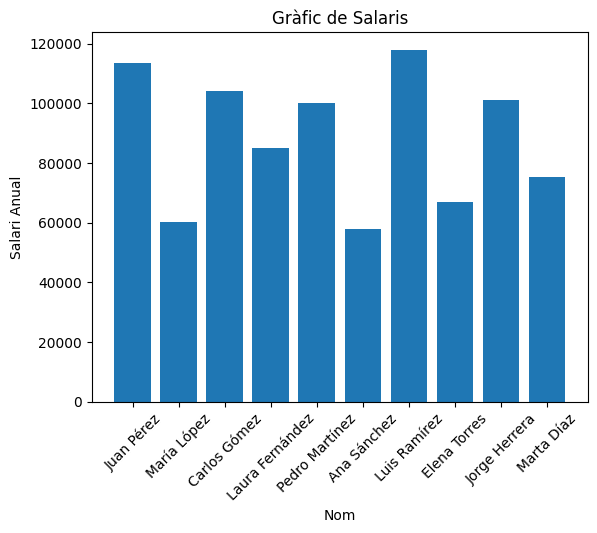

In [7]:
# Utilitzem la biblioteca PYPLOT per crear gràfics.
import matplotlib.pyplot as plt

# Gràfic d'exemple
plt.bar(data['Nombre'], data['Salario Anual'])  # Dibuixa un gràfic de barres
plt.title('Gràfic de Salaris')  # Afegeix un títol
plt.xlabel('Nom')  # Etiqueta de l'eix X
plt.ylabel('Salari Anual')  # Etiqueta de l'eix Y
plt.xticks(rotation=45)  # Rota les etiquetes de l'eix X per millorar la visibilitat
plt.show()



In [ ]:
# Farem servir la llibreria reportlab per crear el informe.
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

# Crear PDF
c = canvas.Canvas("Exercici_3_Output/informe.pdf", pagesize=letter)
c.drawString(100, 750, "Informe Generat amb ReportLab")
c.save()